
---

**General information**  

This is the final assignment for UCL CASA module Data Science for Spatial Systems (CASA0006). **Github repository containing code and data: [here](https://github.com/Murphy829/SPATIALDS)**

Languages used: Python ver.3.10.5  
Libraries needed: All libraris needed is contain in docker created by Jon Reades [Githublink](https://github.com/jreades/sds_env).  
Word count: 1453

---


In [1]:
import sys
print(sys.version)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]


# Title：Using clustering algorithms to highlight the geographical of property crime in London (2022)
---


## Table of contents

1. [Introduction](#introduction)  
2. [Literature review](#literature)   
3. [Methodology](#method) 
4. [Presentation of Data](#data) 
5. [Analysis](#analysis)  
6. [Results and Discussion](#results)   
7. [Conclusion](#conclusion)  
[Reference](#reference)  
[Appendix](#appendix) 

##  1. Introduction <a name="introduction"></a>
---


This essay offers a exploratory data analysis of London's property crime, and adds housing and socio-economic related data to the crime rate data to further highlight the geographical distribution of the occurrence of property crime. Using publicly available data from the Office for National Statistics (UK), The research analyses the various crime rate clusters in London using kmeans algorithms and PCA.

### 1.1 Libraries needed
The comprehensive list of the packages needed in this notebook, along with a description of their functions.

In [2]:
import os

#Data processing
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import geopandas as gpd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from esda.adbscan import ADBSCAN
from scipy.cluster.hierarchy import dendrogram

import warnings

## 2. Literature review <a name="literature"></a>
---
[2.1 Literature review](#2.1)  
[2.2 Data and Enquiry](#2.2)  
[2.3 Research questions](#2.3)

### 2.1 Literature review
<a id='2.1'></a>

Decades of research have shown that crime is concentrated on a range of spatial scales. These findings have clear implications for crime prediction and police resource allocation models [(Johnson, 2010)](https://www.cambridge.org/core/journals/european-journal-of-applied-mathematics/article/brief-history-of-the-analysis-of-crime-concentration/4DD75FAB576E54B318DE883E55E6CA6A).These findings have consequences for controlling land use that may have a high risk of crime as well as implementing policies, among other management practises.

The spatial distribution of burglary is important for understanding how to reduce crime rates. [(Cahill, 2004)](https://www.ojp.gov/pdffiles1/nij/grants/209263.pdf)。The uneven spatial distribution of burglary incidents suggests that the driving causes of crime may be different between areas. Studies show that crime rates in urban centers are typically higher than those in urban fringe areas[(Burnham et al., 2004)](https://www.tandfonline.com/doi/full/10.1080/0003684042000233131). Communities with high crime rates are associated with higher economic disadvantage [(Wang et al., 2019)](https://www.mdpi.com/2220-9964/8/1/51)

On the other hand, studies show that the value of a home increases a community's risk of experiencing residential burglary ([White, 1990](https://www.tandfonline.com/doi/abs/10.1080/07418829000090471) [Malczewski & Poetz, 2005](https://www.tandfonline.com/doi/full/10.1111/j.1467-9272.2005.00496.x)) Additionally, it was shown that the danger of burglary was greater in neighbourhoods where affluent homes bordered poor homes than in neighbourhoods where wealthy homes were surrounded by similarly wealthy homes ([Bowers, 1998](https://academic.oup.com/bjc/article/38/3/429/410404)). Therefore, an attempt can be made to use housing/socioeconomic related data to delve into the geographical distribution of property crimes such as burglaries.


### 2.2 Data and Enquiry
<a id='2.2'></a>

The borough-scale crime statistics selected for this study include statistics on the different types of crime in each borough. There are 32 boroughs in the city of London, each with a population between 150,000 and 400,000 and an area between 1,400 and 15,000 hectares. Combined with the 2021 Census data, the crime rate per 10,000 population can be calculated for each borough, which can be used to reduce the error caused by the population gap between boroughs. Average house price data at the borough level are also supplemented and analyzed in conjunction with crime rate data to highlight the geospatial distribution of crime events.


### 2.3 Research questions
<a id='2.3'></a>

This thus brings us to our study question:   
**What is the spatial distribution of property crime rates in the City of London?**  
Below is an overview of how to resolve the research question.

## 3. Methodology <a name="method"></a>
---


There are various classification techniques that can be used to group or regionalise events/regions. They include PCA, K-means, DBSCAN.

The geographical distribution of crime is complex and clustering analysis is often used to establish the spatial pattern of crime. There are various clustering techniques and ancillary techniques that can be used to group events/functions, such as PCA, K-means, DBSCAN, etc. K-means clustering is an unsupervised machine learning algorithm. It is one of the simplest and most effective clustering algorithms and one of the most effective algorithms used for clustering observations. It attempts to divide n observations into k clusters 
where each observation belongs to the class with the nearest mean [(Agarwal et al.,2017)](https://d1wqtxts1xzle7.cloudfront.net/87844361/pxc3892579-libre.pdf?1655830910=&response-content-disposition=inline%3B+filename%3DCrime_Analysis_using_K_Means_Clustering.pdf&Expires=1682343761&Signature=PBc4h1D6EX7T6VU25F5yXdU4K5xV6pHTYo4LwjPZ3ehbQ8tu57bbTZPXotsODIviRmbURiDtATtEPm~oJX~HhbWTf1f1rsxiC8dwVXlw9qxQxWvd60wrsAU3AYfkxBIkYAs1YeXBvFoeAsTJQ8ADCNI9VudOIvLZelm25HaxPKPXz1hKnOyt-Gto-F2pz-mu8~t-NSMXKTYOVC82jBVvG3~SDXqAEh29-WiNMmojB68Hk9tJcPTJ0CL5MJfYI9JVjDXsZ2guT6NoUj8ZsmENZ~MUnZiCQcHtHn4-nyqq3vjNISKLAnqBonzDrDcFQbhVAtuDihfkRzgMhutwdGgTHw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA).


For studying the spatial distribution of crime rates, we can use geographic location and crime rate data as samples for clustering. k-means algorithm can divide spatially adjacent areas and areas with similar crime rates into the same group, thus helping us to discover areas with high crime rates, areas with low crime rates and trends in crime rate changes. Therefore, the k-means algorithm is suitable for studying the spatial distribution of crime rates.The PCA technique reduces the number of features by lowering the dimensionality, avoiding that too many features can cause the Euclidean distance to fail in a high-dimensional space and improve the accuracy of clustering [(Min et al., 2018)](https://ieeexplore.ieee.org/abstract/document/8495776).

The analysis process is divided into three steps, the first step will use PCA to reduce the dimensionality and select the appropriate variables; the second step will use the kmeans algorithm and the elbow method to optimise the number of iterative clusters; the third step will visualise the results on a map.


## 4. Presentation of Data <a name="data"></a>
---
[4.1 Data gathering and prepation](#4.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.1.1 Reading crime data per borough in London of 2022](#411)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.1.2 Reading population data in London of 2021](#4.1.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.1.3 Reading houseprice data in London of 2022](#4.1.3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; [4.1.4 Reading London borough shape](#4.1.4)  
[4.2 Data visualisation](#4.2)

### 4.1 Data gathering and prepation
<a id='4.1'></a>


The London region is a bustling commercial hub with a variety of factors contributing to crime, including growing housing costs and escalating crime rates [(Mburu, 2016)](https://www.mdpi.com/2220-9964/5/4/47). Richer neighbourhoods will have a greater variety of alternatives for property crimes, making them more alluring to burglars [(Bernasco, 2015)](https://www.sciencedirect.com/science/article/pii/S0143622815000806#bib48).

The spatial scale was chosen to be London Borough scale and the time scale was chosen to be 2022. The crime data will cover the period from 01/2022 to 12/2022. The following four datasets will be pre-processed and visualised. 

| Dataset Name  | Data format | Source  | Selected variables                                                                                                                                                                                                       |        |
| ----------------------------------------------------------------------- | --------- | ----------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------ |
| MPS Borough Level Crime (most recent 24 months)(01/04/2021-31/03/2023)   | csv       | [Metropolitan Police Service (UK)](https://data.london.gov.uk/dataset/recorded_crime_summary)    | Arson_and_Criminal_Damage, Burglary, Drug_Offences, Miscellaneous_Crimes_Against_Society, Possession_of_Weapons , Public_Order_Offences, Robbery, Sexual_Offences, Theft , Vehicle_Offences, Violence_Against_the_Person |        |
| census2021firstresultsenglandwales1                                     | csv       | [Office for National Statistics (UK)](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationandhouseholdestimatesenglandandwalescensus2021) | Area_code, Area_name, All_persons     |
| statistic_id1029250_average-house-prices-in-london-2021-2022-by-borough | csv       | [Office for National Statistics (UK)](https://www.statista.com/statistics/1029250/average-house-prices-in-london-united-kingdom-by-borough) |    name, Jun-22 |
| 2022_LondonBorough_Boundary  |   gpkg  |   [Greater LONDON Authority](https://data.london.gov.uk/dataset/london_boroughs)               |  gss_code, geometry                                                                                                                                                                                   |        |



#### 4.1.1 Reading crime data per borough in London of 2022
<a id='4.1.1'></a>

In [3]:
# Read crime data per borough in London of 2022
# crime data originally from 'https://data.london.gov.uk/dataset/recorded_crime_summary'
df_crime = pd.read_csv('https://raw.githubusercontent.com/Murphy829/SPATIALDS/main/Datasets/20101022_LondonBorough_CrimeNumbersByCaterlories/MPS%20Borough%20Level%20Crime%20(most%20recent%2024%20months)%20.csv')

In [4]:
# Check the head of dataframe
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,202101,202102,202103,202104,202105,202106,202107,...,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212
0,Arson and Criminal Damage,Arson,Aviation Security (SO18),0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,0
1,Arson and Criminal Damage,Criminal Damage,Aviation Security (SO18),3,3,0,4,1,2,4,...,3,8,4,4,2,10,4,9,6,5
2,Burglary,Burglary Business and Community,Aviation Security (SO18),0,0,0,0,0,0,0,...,2,1,0,0,1,1,0,0,1,1
3,Drug Offences,Drug Trafficking,Aviation Security (SO18),0,0,1,0,0,0,0,...,0,0,0,1,2,0,0,0,0,1
4,Drug Offences,Possession of Drugs,Aviation Security (SO18),4,0,4,0,2,3,3,...,1,2,11,2,6,5,8,3,7,4


In [5]:
# Select columns needed
df_crime_boros_m = df_crime.loc[:,['MajorText','LookUp_BoroughName','202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212']]
df_crime_boros_m.head()

# Add the twelve months of crime to get the total 2022 value
df_crime_boros_m['2022'] = df_crime_boros_m[['202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212']].sum(axis=1)

# Merge duplicate rows and counting
df_crime_boros_g = df_crime_boros_m.groupby(['LookUp_BoroughName', 'MajorText'], sort=False)['2022'].sum().reset_index()

# Expand the major crime types
df_crime_boros = df_crime_boros_g.pivot(index=['LookUp_BoroughName'], columns=['MajorText'], values='2022')
df_crime_boros = df_crime_boros.rename(columns=lambda x: x.replace(' ', '_'))

# Drop unneeded variables
df_crime_boros = df_crime_boros.drop(['Aviation Security (SO18)'])

# Calculate the total number of offences in each category
df_crime_boros['Total'] = df_crime_boros['Arson_and_Criminal_Damage']+df_crime_boros['Arson_and_Criminal_Damage']+df_crime_boros['Burglary']+df_crime_boros['Drug_Offences']+df_crime_boros['Miscellaneous_Crimes_Against_Society']+df_crime_boros['Possession_of_Weapons']+df_crime_boros['Public_Order_Offences']+df_crime_boros['Robbery']+df_crime_boros['Sexual_Offences']+df_crime_boros['Theft']+df_crime_boros['Vehicle_Offences']+df_crime_boros['Violence_Against_the_Person']

# Resetting index for data processing
df_crime_boros = df_crime_boros.reset_index()

# Changing the column name, consistent with other dataframe
df_crime_boros = df_crime_boros.rename(columns={'LookUp_BoroughName':'neighbourhood'})

In [6]:
df_crime_boros.head()

MajorText,neighbourhood,Arson_and_Criminal_Damage,Burglary,Drug_Offences,Miscellaneous_Crimes_Against_Society,Possession_of_Weapons,Public_Order_Offences,Robbery,Sexual_Offences,Theft,Vehicle_Offences,Violence_Against_the_Person,Total
0,Barking and Dagenham,1485,1150,1521,340,153,1381,632,761,3710,2906,7192,22716
1,Barnet,1838,2582,1006,365,159,1931,731,750,5746,5062,7789,29797
2,Bexley,1422,797,736,267,133,1189,263,513,2773,2168,5751,17434
3,Brent,1951,1970,1785,401,229,2320,944,826,6423,3802,9824,32426
4,Bromley,1882,1430,1213,323,168,1745,544,639,4809,3431,6700,24766


In [7]:
# Dealing with Nulls
df_crime_boros.isnull().sum()

MajorText
neighbourhood                           0
Arson_and_Criminal_Damage               0
Burglary                                0
Drug_Offences                           0
Miscellaneous_Crimes_Against_Society    0
Possession_of_Weapons                   0
Public_Order_Offences                   0
Robbery                                 0
Sexual_Offences                         0
Theft                                   0
Vehicle_Offences                        0
Violence_Against_the_Person             0
Total                                   0
dtype: int64

In [8]:
# Dealing with NaNs
df_crime_boros.isna().sum()

MajorText
neighbourhood                           0
Arson_and_Criminal_Damage               0
Burglary                                0
Drug_Offences                           0
Miscellaneous_Crimes_Against_Society    0
Possession_of_Weapons                   0
Public_Order_Offences                   0
Robbery                                 0
Sexual_Offences                         0
Theft                                   0
Vehicle_Offences                        0
Violence_Against_the_Person             0
Total                                   0
dtype: int64

No null or default values to replace or delete

In [9]:
# Checking the info and types of variables
df_crime_boros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   neighbourhood                         32 non-null     object
 1   Arson_and_Criminal_Damage             32 non-null     int64 
 2   Burglary                              32 non-null     int64 
 3   Drug_Offences                         32 non-null     int64 
 4   Miscellaneous_Crimes_Against_Society  32 non-null     int64 
 5   Possession_of_Weapons                 32 non-null     int64 
 6   Public_Order_Offences                 32 non-null     int64 
 7   Robbery                               32 non-null     int64 
 8   Sexual_Offences                       32 non-null     int64 
 9   Theft                                 32 non-null     int64 
 10  Vehicle_Offences                      32 non-null     int64 
 11  Violence_Against_the_Person       

#### 4.1.2 Reading population data in London of 2021
<a id='4.1.2'></a>

In [10]:
# Reading population data
# population data originally from 'https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationandhouseholdestimatesenglandandwalescensus2021'
df_popu = pd.read_csv('https://raw.githubusercontent.com/Murphy829/SPATIALDS/main/Datasets/2022_LondonBorough_population/census2021firstresultsenglandwales1.csv')
df_popu = df_popu.rename(columns={'Area name':'neighbourhood'})

df_popu = df_popu .rename(columns=lambda x: x.replace(' ', '_'))

df_popu.head()

,Area_code,neighbourhood,All_persons,Females,Males
0,E09000007,Camden,210100,110600,99500
1,E09000001,City of London,8600,3800,4800
2,E09000012,Hackney,259200,135300,123900
3,E09000013,Hammersmith and Fulham,183200,97200,85900
4,E09000014,Haringey,264200,137000,127200


In [11]:
# Dealing with Nulls
df_popu .isnull().sum()

Area_code        0
neighbourhood    0
All_persons      0
Females          0
Males            0
dtype: int64

In [12]:
# Dealing with NaNs
df_popu .isna().sum()

Area_code        0
neighbourhood    0
All_persons      0
Females          0
Males            0
dtype: int64

No null or default values to replace or delete

In [13]:
# Merge population data to crime counts data
from functools import reduce
df_groups = [df_crime_boros,df_popu]
df_crimerate_boros = reduce(lambda left, right: pd.merge(left, right, on=['neighbourhood']), df_groups)

In [14]:
# Calculating crime rate using population and crime counts data, yhe unit for crime rate is crimes per 100,000 people
df = df_crimerate_boros
df['Arson_and_Criminal_Damage'] = df['Arson_and_Criminal_Damage'] /df['All_persons'] *10000
df['Burglary'] = df['Burglary'] /df['All_persons'] *10000
df['Drug_Offences'] = df['Drug_Offences'] /df['All_persons'] *10000
df['Miscellaneous_Crimes_Against_Society'] = df['Miscellaneous_Crimes_Against_Society'] /df['All_persons'] *10000
df['Possession_of_Weapons'] = df['Possession_of_Weapons'] /df['All_persons'] *10000
df['Public_Order_Offences'] = df['Public_Order_Offences'] /df['All_persons'] *10000
df['Robbery'] = df['Robbery'] /df['All_persons'] *10000
df['Sexual_Offences'] = df['Sexual_Offences'] /df['All_persons'] *10000
df['Theft'] = df['Theft'] /df['All_persons'] *10000
df['Vehicle_Offences'] = df['Vehicle_Offences'] /df['All_persons'] *10000
df['Violence_Against_the_Person'] = df['Violence_Against_the_Person'] /df['All_persons'] *10000
df['Total'] = df['Total'] /df['All_persons'] *10000

In [15]:
# Checking df
df.head()

,neighbourhood,Arson_and_Criminal_Damage,Burglary,Drug_Offences,Miscellaneous_Crimes_Against_Society,Possession_of_Weapons,Public_Order_Offences,Robbery,Sexual_Offences,Theft,Vehicle_Offences,Violence_Against_the_Person,Total,Area_code,All_persons,Females,Males
0,Barking and Dagenham,67.839196,52.535404,69.483783,15.532206,6.989493,63.088168,28.871631,34.764733,169.483783,132.754683,328.551850,1037.734125,E09000002,218900,112400,106500
1,Barnet,47.212946,66.324172,25.841254,9.375803,4.084254,49.601849,18.777293,19.265348,147.598253,130.028256,200.077061,765.399435,E09000003,389300,200900,188400
2,Bexley,57.687627,32.332657,29.858012,10.831643,5.395538,48.235294,10.669371,20.811359,112.494929,87.951318,233.306288,707.261663,E09000004,246500,128000,118500
3,Brent,57.416127,57.975280,52.530901,11.801059,6.739258,68.275456,27.781048,24.308417,189.022955,111.889347,289.111242,954.267216,E09000005,339800,173100,166800
4,Bromley,57.030303,43.333333,36.757576,9.787879,5.090909,52.878788,16.484848,19.363636,145.727273,103.969697,203.030303,750.484848,E09000006,330000,171700,158200


In [16]:
# Dropping unwanted columns
df = df.drop(columns=['All_persons','Females','Males'])  

# Changing the column name, consistent with other dataframe
df = df.rename(columns = {'Area_code':'gss_code'})

# Assigning the df_crimerate_boros back
df_crimerate_boros = df

#### 4.1.3 Reading houseprice data in London of 2022
<a id='4.1.3'></a>

In [17]:
# Loading houseprice data in London of 2022
# Source link: 'https://www.statista.com/statistics/1029250/average-house-prices-in-london-united-kingdom-by-borough/'
df_houseprice_raw = pd.read_csv('https://raw.githubusercontent.com/Murphy829/SPATIALDS/main/Datasets/statistic_id1029250_average-house-prices-in-london-2021-2022-by-borough.csv?raw=true')

In [18]:
# Checking df
df_houseprice_raw

,Name,Jun-21,Jun-22
0,Kensington and Chelsea,1213616.63,1362055.48
1,City of Westminster,858524.19,944440.75
2,City of London,773731.64,830376.17
3,Camden,814597.11,829856.91
4,Hammersmith and Fulham,736566.36,772446.89
5,Richmond upon Thames,694011.91,768604.86
6,Islington,658209.86,717486.60
7,Wandsworth,589862.66,638840.62
8,Hackney,580537.99,628689.94
9,Barnet,547181.09,599286.62


In [19]:
# Selecting columns needed
df_houseprice2022 = df_houseprice_raw.drop('Jun-21', axis=1)
df_houseprice2022.columns = ['neighbourhood','MeanHousePrice2022']

# Change the boroname that don not match
df_houseprice2022.iloc[1,0] = 'Westminster'

df_houseprice2022.head()

,neighbourhood,MeanHousePrice2022
0,Kensington and Chelsea,1362055.48
1,Westminster,944440.75
2,City of London,830376.17
3,Camden,829856.91
4,Hammersmith and Fulham,772446.89


In [20]:
# Merging the crime and houseprice data
df_merge = pd.merge(left = df_crimerate_boros, right=df_houseprice2022 ,how='left',left_on='neighbourhood',right_on='neighbourhood')

In [21]:
# Checking df
df_merge.head()

,neighbourhood,Arson_and_Criminal_Damage,Burglary,Drug_Offences,Miscellaneous_Crimes_Against_Society,Possession_of_Weapons,Public_Order_Offences,Robbery,Sexual_Offences,Theft,Vehicle_Offences,Violence_Against_the_Person,Total,gss_code,MeanHousePrice2022
0,Barking and Dagenham,67.839196,52.535404,69.483783,15.532206,6.989493,63.088168,28.871631,34.764733,169.483783,132.754683,328.551850,1037.734125,E09000002,342083.45
1,Barnet,47.212946,66.324172,25.841254,9.375803,4.084254,49.601849,18.777293,19.265348,147.598253,130.028256,200.077061,765.399435,E09000003,599286.62
2,Bexley,57.687627,32.332657,29.858012,10.831643,5.395538,48.235294,10.669371,20.811359,112.494929,87.951318,233.306288,707.261663,E09000004,395012.08
3,Brent,57.416127,57.975280,52.530901,11.801059,6.739258,68.275456,27.781048,24.308417,189.022955,111.889347,289.111242,954.267216,E09000005,528087.42
4,Bromley,57.030303,43.333333,36.757576,9.787879,5.090909,52.878788,16.484848,19.363636,145.727273,103.969697,203.030303,750.484848,E09000006,508544.88


#### 4.1.4 Reading London borough shape
<a id='4.1.4'></a>

In [22]:
# Read London borough shape
# London borough boundaries shape data originally from 'https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg'
boros = gpd.read_file('https://github.com/Murphy829/SPATIALDS/blob/main/Datasets/2022_LondonBorough_Boundary&Area/London_Boroughs.gpkg?raw=true')

In [23]:
# Merging crimerate_houseprice and borough boundries
gdf = gpd.GeoDataFrame(df_merge.merge(boros, on='gss_code'))
gdf.head()

,neighbourhood,Arson_and_Criminal_Damage,Burglary,Drug_Offences,Miscellaneous_Crimes_Against_Society,Possession_of_Weapons,Public_Order_Offences,Robbery,Sexual_Offences,Theft,...,Total,gss_code,MeanHousePrice2022,objectid,name,hectares,nonld_area,ons_inner,sub_2011,geometry
0,Barking and Dagenham,67.839196,52.535404,69.483783,15.532206,6.989493,63.088168,28.871631,34.764733,169.483783,...,1037.734125,E09000002,342083.45,33,Barking and Dagenham,3779.934,169.150,F,East,"POLYGON ((545802.000 181308.800, 545798.400 18..."
1,Barnet,47.212946,66.324172,25.841254,9.375803,4.084254,49.601849,18.777293,19.265348,147.598253,...,765.399435,E09000003,599286.62,10,Barnet,8674.837,0.000,F,North,"POLYGON ((517435.200 194421.100, 517437.400 19..."
2,Bexley,57.687627,32.332657,29.858012,10.831643,5.395538,48.235294,10.669371,20.811359,112.494929,...,707.261663,E09000004,395012.08,13,Bexley,6428.649,370.619,F,East,"POLYGON ((547448.000 170380.300, 547429.200 17..."
3,Brent,57.416127,57.975280,52.530901,11.801059,6.739258,68.275456,27.781048,24.308417,189.022955,...,954.267216,E09000005,528087.42,9,Brent,4323.270,0.000,F,West,"POLYGON ((515767.200 186062.800, 515860.000 18..."
4,Bromley,57.030303,43.333333,36.757576,9.787879,5.090909,52.878788,16.484848,19.363636,145.727273,...,750.484848,E09000006,508544.88,3,Bromley,15013.487,0.000,F,South,"POLYGON ((540373.600 157530.400, 540361.200 15..."


In [24]:
# Checking gdf
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   neighbourhood                         32 non-null     object  
 1   Arson_and_Criminal_Damage             32 non-null     float64 
 2   Burglary                              32 non-null     float64 
 3   Drug_Offences                         32 non-null     float64 
 4   Miscellaneous_Crimes_Against_Society  32 non-null     float64 
 5   Possession_of_Weapons                 32 non-null     float64 
 6   Public_Order_Offences                 32 non-null     float64 
 7   Robbery                               32 non-null     float64 
 8   Sexual_Offences                       32 non-null     float64 
 9   Theft                                 32 non-null     float64 
 10  Vehicle_Offences                      32 non-null     float64 
 11  

In [25]:
# Writing out gdf
# gdf.to_csv('CrimeRate_LondonBorough_2022.csv', index=False)

### 4.2 Data visualisation
<a id='4.2'></a>

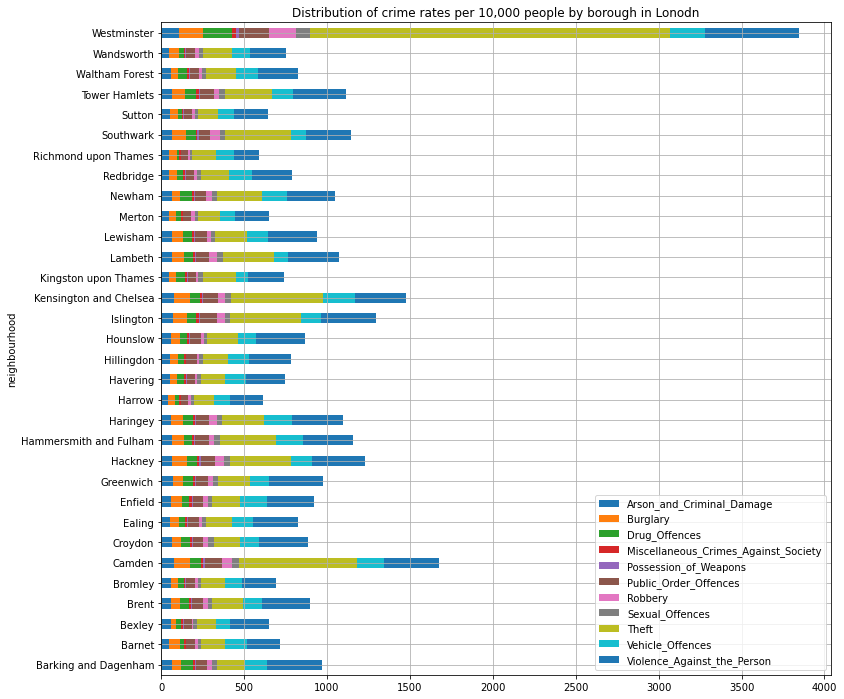

In [26]:
# plot crime data in stack manner of bar type
crime_gdf = gdf.iloc[:, :12]
crime_gdf


fig = crime_gdf.plot(x='neighbourhood', 
               kind='barh', stacked=True,
               title='Distribution of crime rates per 10,000 people by borough in Lonodn',
              figsize=(12,12),
                    grid=True)

plt.show()
#fig.get_figure().savefig("Crime_rate_by_London_Borough.png",bbox_inches = 'tight', dpi=200)

It can be seen from this picture that the crime rate per 10,000 people in westminister is much higher than that of other boroughs. Theft, vehicle offenses, and Violence Against the Person account for a relatively high proportion of the total crimes, and theft can be used as the main cluster for identification.

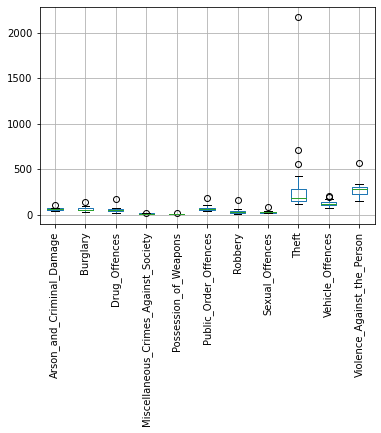

In [27]:
#boxplot all crime rates
boxplot = gdf.boxplot(column=['Arson_and_Criminal_Damage', 
                              'Burglary',
                              'Drug_Offences',
                              'Miscellaneous_Crimes_Against_Society',
                              'Possession_of_Weapons', 
                              'Public_Order_Offences', 
                              'Robbery', 
                              'Sexual_Offences',
                              'Theft',
                              'Vehicle_Offences',
                              'Violence_Against_the_Person'])

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)

plt.show() 

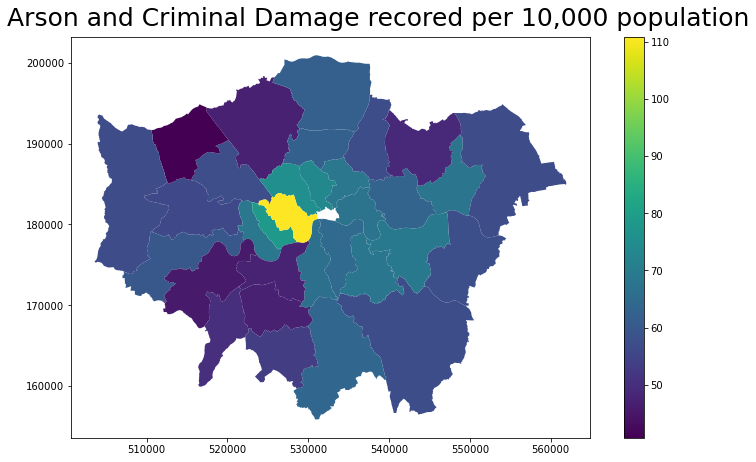

In [28]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Arson_and_Criminal_Damage', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Arson and Criminal Damage recored per 10,000 population", x=0.5, size=25)
#plt.savefig('Arson_and_Criminal_Damage.png', dpi=200)

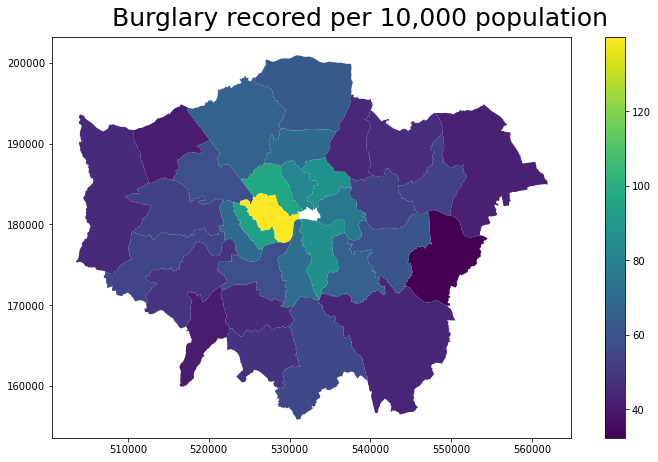

In [29]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Burglary', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Burglary recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Burglary.png', dpi=200)

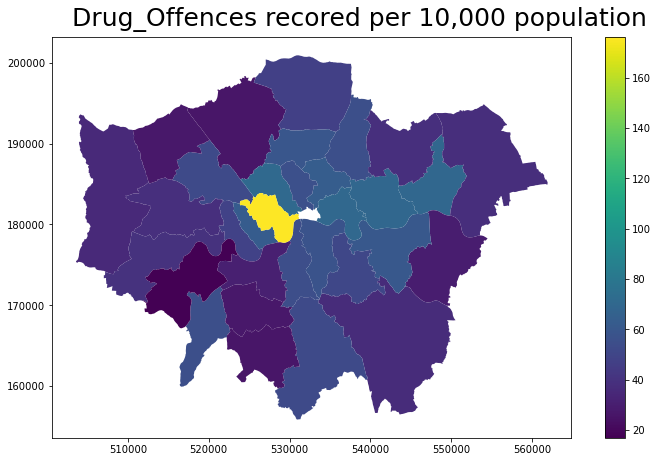

In [30]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Drug_Offences', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Drug_Offences recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Drug_Offences.png', dpi=200)

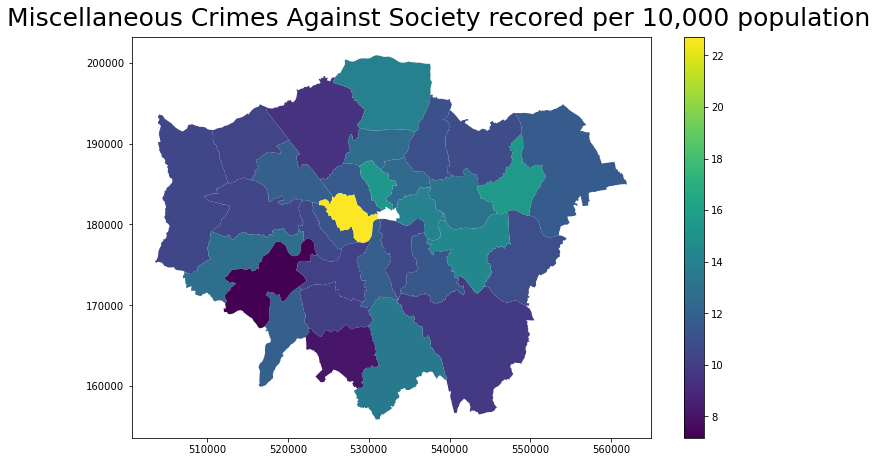

In [31]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Miscellaneous_Crimes_Against_Society', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Miscellaneous Crimes Against Society recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Miscellaneous_Crimes_Against_Society.png', dpi=200)

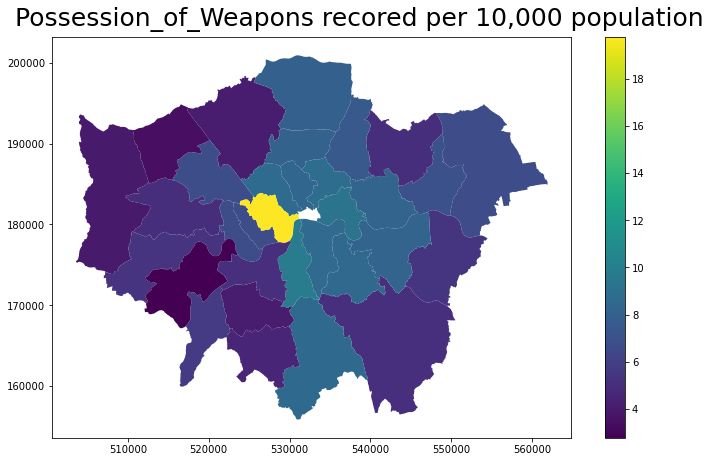

In [32]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Possession_of_Weapons', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Possession_of_Weapons recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Possession_of_Weapons.png', dpi=200)

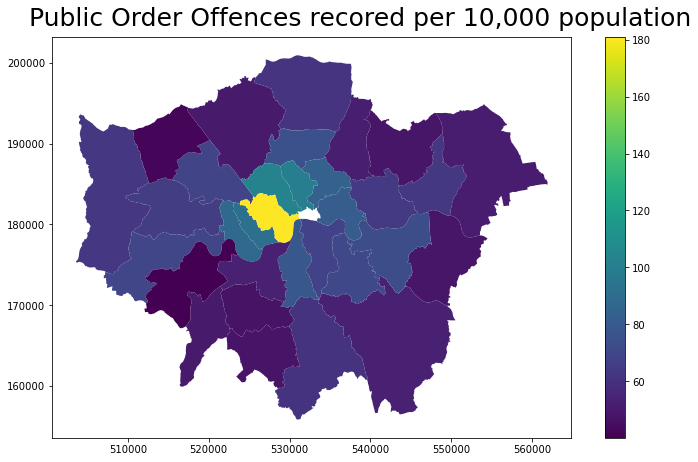

In [33]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Public_Order_Offences', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Public Order Offences recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Public_Order_Offences.png', dpi=200)

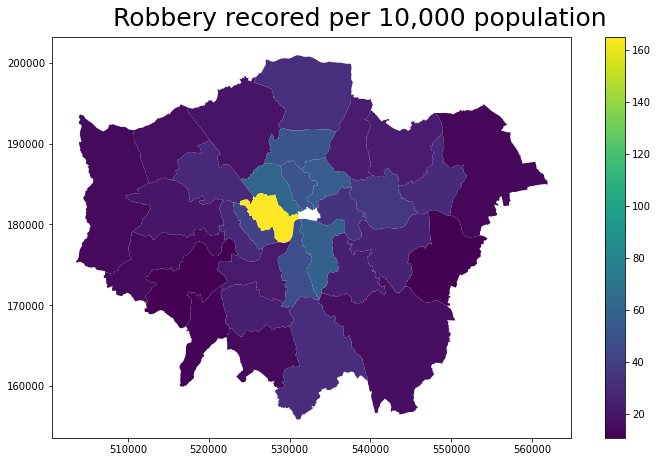

In [34]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Robbery', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Robbery recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Robbery.png', dpi=200)

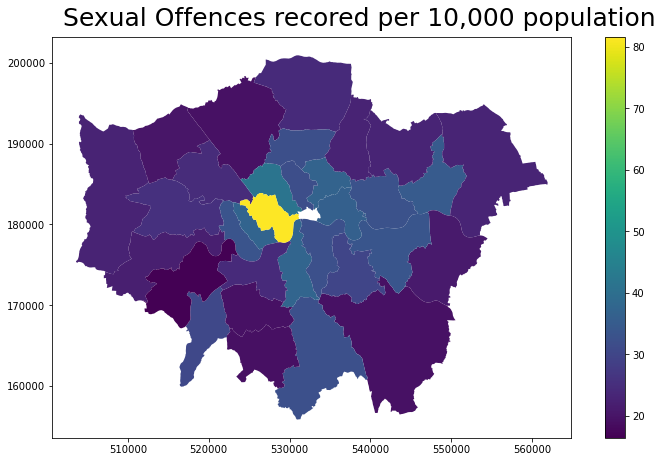

In [35]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Sexual_Offences', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Sexual Offences recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Sexual_Offences.png', dpi=200)

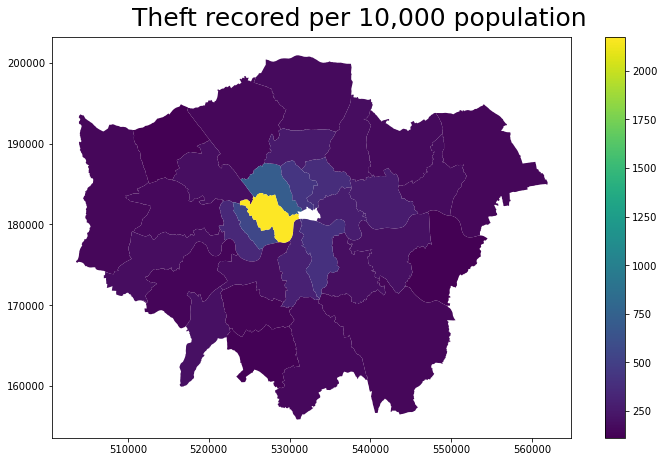

In [36]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Theft', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Theft recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Theft.png', dpi=200)

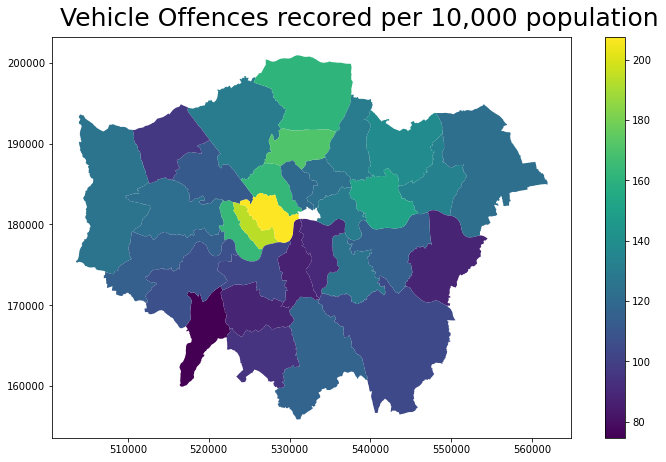

In [37]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Vehicle_Offences', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Vehicle Offences recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Vehicle_Offences.png', dpi=200)

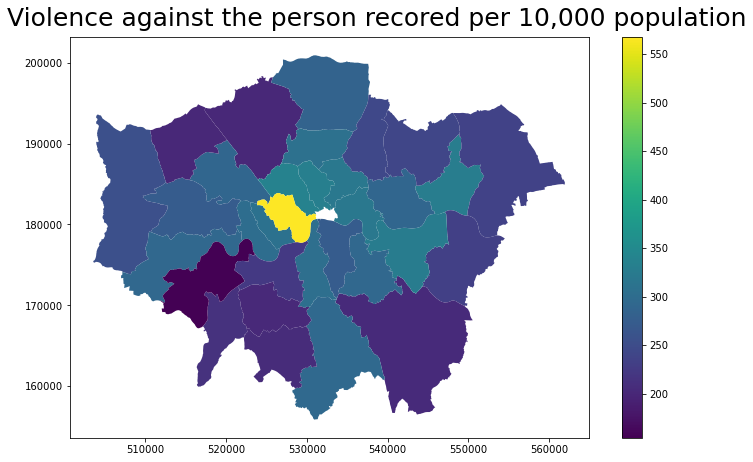

In [38]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='Violence_Against_the_Person', legend=True, cmap='viridis', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Violence against the person recored per 10,000 population", x=0.5, size=25);
#plt.savefig('Violence_Against_the_Person.png', dpi=200)

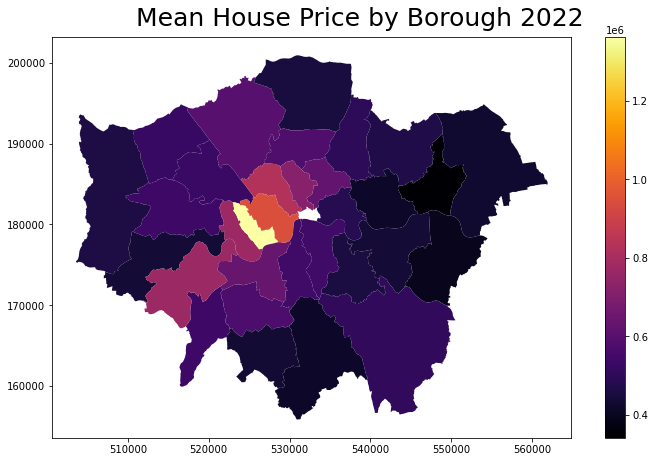

In [39]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
gdf.plot(column='MeanHousePrice2022', legend=True, cmap='inferno', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle("Mean House Price by Borough 2022", x=0.5, size=25);
#plt.savefig('MeanHousePrice2022.png', dpi=200)

## 5.Analsysis <a name="analysis"></a>
---
[5.1 Variable Selection](#5.1)  
[5.2 Standardisation](#5.2)  
[5.3 Fuctions](#5.3)  
[5.4 DBSCAN](#5.4)  
[5.5 Kmeans](#5.5)

### 5.1 Variable Selection
<a id='5.1'></a>

#### PCA(Principal Component Analysis)

In [40]:
from sklearn.decomposition import PCA

# Dropping unneeded variables
gdf_crime = gdf[['Arson_and_Criminal_Damage',
                 'Burglary',
                 'Drug_Offences',
                 'Miscellaneous_Crimes_Against_Society',
                 'Possession_of_Weapons',
                 'Public_Order_Offences', 
                 'Robbery',
                 'Sexual_Offences',
                 'Theft',
                 'Vehicle_Offences',
                 'Violence_Against_the_Person',
                 'MeanHousePrice2022']]
# PCA analysis
pca = PCA().fit(gdf_crime)

# Obtaining principal component weights and counts
loadings = pca.components_
pc_count = pca.n_features_

# Generating a list of names for the principal components
pcs = ["PC"+str(i) for i in list(range(1, pc_count+1))]

# Generating DataFrame from principal component weights
df_pca = pd.DataFrame.from_dict(dict(zip(pcs, loadings)))
df_pca ['variable'] = gdf_crime.columns.values

# Setting the "variable" column as an index to the data frame to make it easily accessible
df_pca  = df_pca.set_index('variable')
df_pca 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
variable,,,,,,,,,,,,
Arson_and_Criminal_Damage,0.000030,0.029248,-0.134719,0.058644,-0.044710,-0.007368,0.376514,0.544189,0.725329,0.012272,1.638812e-02,0.105253
Burglary,0.000072,0.041040,-0.141021,0.142894,0.724472,-0.111151,0.501299,-0.399785,0.039385,0.084306,2.698906e-02,0.016736
Drug_Offences,0.000048,0.074672,-0.171301,0.021269,-0.108929,0.844589,0.313352,0.062670,-0.251035,0.260539,-7.528247e-02,0.027333
Miscellaneous_Crimes_Against_Society,0.000002,0.007055,-0.027216,0.007903,-0.037725,0.042016,-0.041304,-0.021522,-0.021403,0.122760,9.712910e-01,0.186695
Possession_of_Weapons,0.000004,0.008183,-0.021876,0.016542,0.031574,0.059628,0.035212,0.069871,0.063476,-0.038109,1.939924e-01,-0.972313
Public_Order_Offences,0.000073,0.062584,-0.197383,0.137776,0.047391,-0.358332,0.270347,0.581225,-0.627918,-0.040670,2.513576e-02,0.004050
Robbery,0.000066,0.074544,-0.075438,0.099249,0.628605,0.266400,-0.604218,0.378887,0.039618,-0.015041,-1.403113e-02,0.046485
Sexual_Offences,0.000026,0.030341,-0.072870,0.066110,0.001286,0.232692,0.115940,-0.058417,-0.030539,-0.950265,9.644358e-02,0.071826
Theft,0.001028,0.972859,0.216787,-0.045159,-0.036118,-0.043119,0.011500,-0.029388,0.018322,0.003171,4.232927e-05,-0.001891


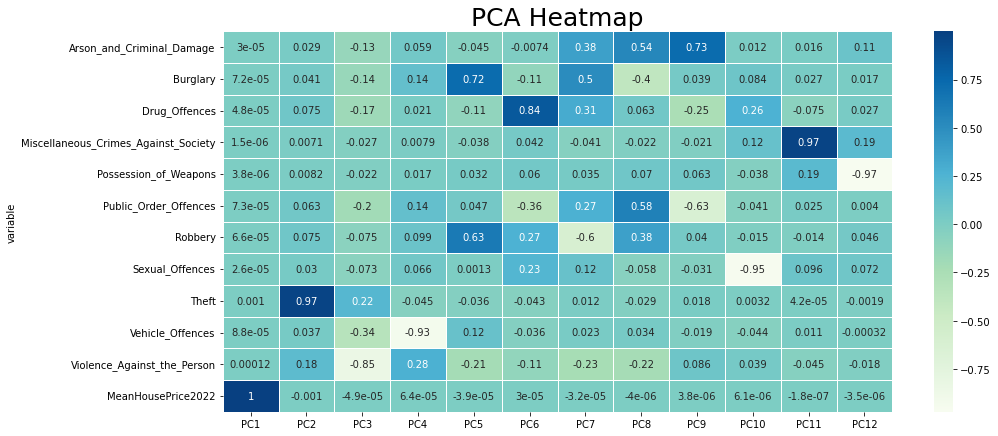

In [41]:
# Plotting heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(df_pca , annot=True, cmap='GnBu',linewidths=.5)
plt.title('PCA Heatmap',fontdict={'fontsize':25})

plt.show()

Variables that correlate the most are MeanHousePrice2022, theft,Miscellaneous_Crimes_Against_Society, burglary, and Drug_Offences. Focusing on property crime, there were three variables selected for analyzing: 

* Burglary
* Theft
* MeanHousePrice2022

Including the ```gss_code``` variable as the index of Boroughs

### 5.2 Standardisation
<a id='5.2'></a>

In [42]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [43]:
raw = gdf[['Burglary',
           'Theft',
           'MeanHousePrice2022',
          'gss_code']].set_index('gss_code').copy()
raw.head()

,Burglary,Theft,MeanHousePrice2022
gss_code,,,
E09000002,52.535404,169.483783,342083.45
E09000003,66.324172,147.598253,599286.62
E09000004,32.332657,112.494929,395012.08
E09000005,57.975280,189.022955,528087.42
E09000006,43.333333,145.727273,508544.88


<AxesSubplot:ylabel='Frequency'>

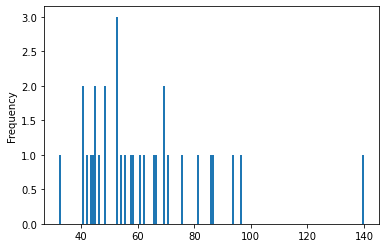

In [44]:
raw.Burglary.plot.hist(bins=150)

In [45]:
normed = raw.copy()
for c in raw.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of Burglary is [-0.5531296372973558, 1.8833151148181038]
The range of Theft is [-0.23876988794391463, 6.885497141975562]
The range of MeanHousePrice2022 is [-0.5186943831151536, 2.3610626036781523]


,Burglary,Theft,MeanHousePrice2022
gss_code,,,
E09000002,-0.095496,-0.041783,-0.518694
E09000003,0.216847,-0.117432,0.207485
E09000004,-0.553130,-0.238770,-0.369257
E09000005,0.027728,0.025755,0.006463
E09000006,-0.303942,-0.123900,-0.048712


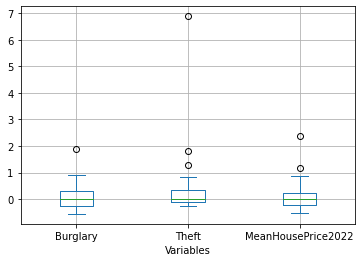

In [46]:
# Plotting boxplots
fig, ax = plt.subplots()
normed.plot(kind='box', ax=ax, grid=True)

ax.set_xlabel('Variables')

plt.show()

<AxesSubplot:xlabel='Burglary', ylabel='MeanHousePrice2022'>

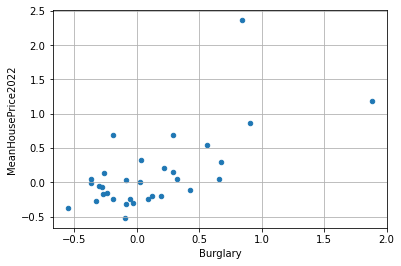

In [47]:
normed.plot.scatter(x= 'Burglary', y='MeanHousePrice2022', grid=True)

### 5.3 Fuctions
<a id='5.3'></a>

In [48]:
# A function for mapping the clustering results:
def mapping_clusters(labels_cluster):
    gdf['cluster_nm'] = labels_cluster
    gdf.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

In [49]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

### 5.4 DBSCAN
<a id='5.4'></a>

In [50]:
print(normed.shape[1] + 1) 

4


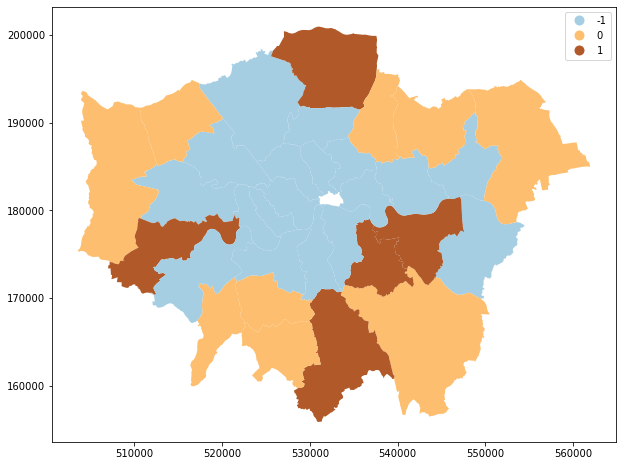

In [51]:
# Visualising the clusters on the map
minPts = 4 # we set minPts as normed.shape[1] + 1 
epsilon = 0.2
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(normed)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.
cluster_nm = dbsc.labels_

mapping_clusters(cluster_nm)

In [52]:
pd.Series(dbsc.labels_).value_counts()

-1    18
 0     9
 1     5
dtype: int64

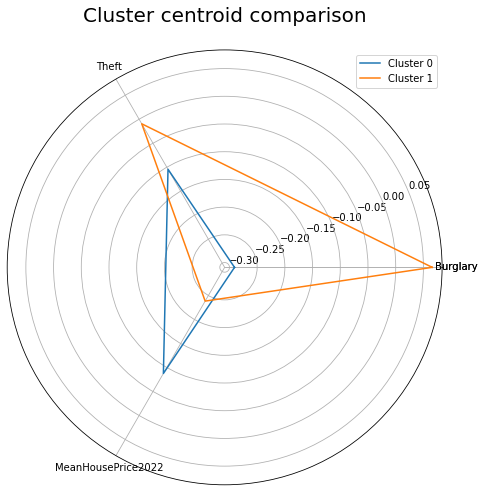

In [53]:
df_dbscan = normed.copy()
df_dbscan['cluster'] = dbsc.labels_
df_dbscan_centroid = df_dbscan.groupby('cluster').mean()
# drop the outlier
df_dbscan_centroid.drop(-1, inplace=True)
# df_dbscan_centroid.reset_index()
radar_plot_cluster_centroids(df_dbscan_centroid)

In [54]:
from sklearn import metrics
metrics.silhouette_score(normed, dbsc.labels_)

-0.009834730915629367

Using the DBSCAN algorithm, two clusters are obtained, with boroughs close to the city centre considered as outliers, such as Westminster. Cluster 0 is characterised by high levels of theft and burglary, but not high average house prices, mainly in the northern and southern boroughs of the city such as Enfield, Lewisham, Greenwich, and Croydon. cluster 1 is characterised by high average house prices and high levels of theft, mainly in Outer London boroughs such as Hillingdon, Kingston, Havering, and Bromley.  

18/32 boroughs were judged to be noise samples, and the clustering of property crime at the borough scale using DBSCAN was not good enough, as confirmed by silhouette_score=-0.0098. So the next attempt was to cluster again using kmeans.

### 5.5 Kmeans
<a id='5.5'></a>

#### First Kmeans

In [55]:
from sklearn.cluster import KMeans

In [56]:
# trying k=4
k_cluster = 4
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

KMeans(n_clusters=4, random_state=1)

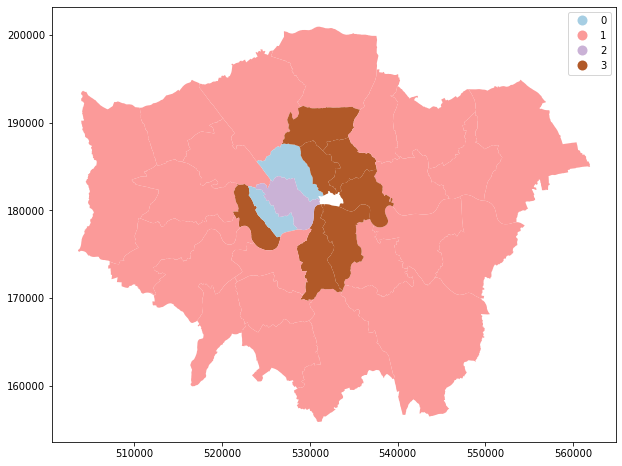

In [57]:
# Visualising the clusters on the map
mapping_clusters(kmeans_method.labels_);

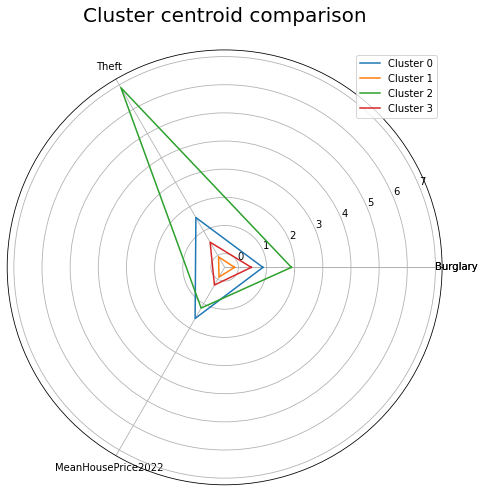

In [58]:
df_cluster_centroid = pd.DataFrame(kmeans_method.cluster_centers_, columns=normed.columns)
radar_plot_cluster_centroids(df_cluster_centroid)

#### Finding the 'right' number of clusters using the Elbow Method

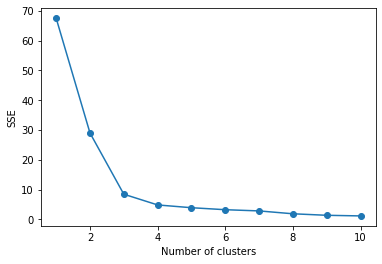

In [59]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the SSE plot, we can see that three might be the optimal k value.

In [60]:
k_cluster = 3
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
x_transformed = kmeans_method.fit_transform(normed)
print(normed.shape)
print(normed.columns)
# print(kmeans_method.labels_)
print(x_transformed.shape)

for centroid in kmeans_method.cluster_centers_:
    print(np.linalg.norm(np.array(normed)[0] - centroid))
print(x_transformed[0])

(32, 3)
Index(['Burglary', 'Theft', 'MeanHousePrice2022'], dtype='object')
(32, 3)
0.446106135291602
7.402378697230549
1.8324523542958895
[0.44610614 7.4023787  1.83245235]


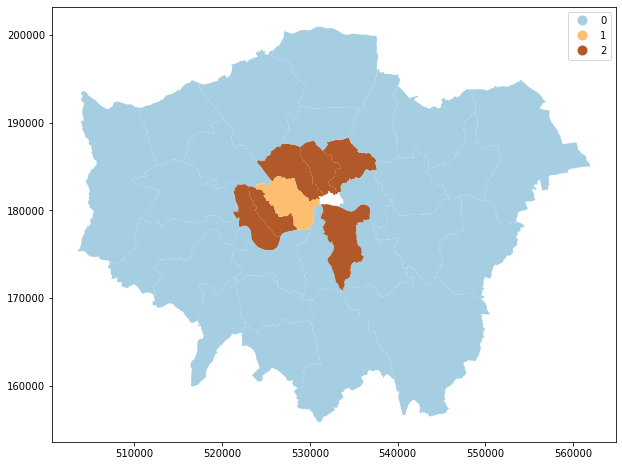

In [61]:
k_cluster = 3
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)

# plotting
mapping_clusters(kmeans_method.labels_)

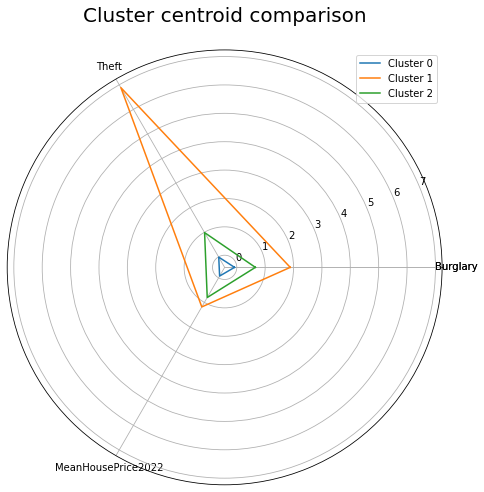

In [62]:
df_cluster_centroid = pd.DataFrame(kmeans_method.cluster_centers_, columns=normed.columns)
radar_plot_cluster_centroids(df_cluster_centroid)

After several attempts using the elbow method and using the kmeans clustering algorithm, three clusters were obtained, cluster 0, cluster 1 and cluster 2. As can be seen from the above figures, cluster 0 boroughs, is far from the city centre and is characterised by a low rate of burglary crime, a low rate of theft crime and a low average house price. The boroughs in cluster 1, only Westminster, is in the heart of London and are characterised by a far higher rate of theft than other areas, as well as a very high rate of burglary and average house prices. Cluster 2 boroughs are located around the city centres of Camden, Islington, Kensington and Chelsea, Southwark and are characterised by higher crime rates and higher average house prices.

## 6. Results and Discussion <a name="results"></a>
---


As shown in the figure above, property crimes are distributed in circles in London. The closer to the city center (such as Cluster1, Cluster2), the higher the crime rate of theft and theft. Explain that in urban centers such as Westminster, Camden, Islington, Kensington and Chelsea borough, more police are needed to fight crime.

## 7. Conclusion <a name="conclusion"></a>
---


In this paper, PCA analysis and Kmeans clustering analysis were conducted on property-based crime data across London to obtain the spatial distribution characteristics of property crime cases in the city, and then identify areas with higher risk of property crime incidents in the city.

The spatial distribution characteristics of property crimes can be easily identified from the clustering results, which can improve the efficiency of the police in fighting property crimes.

### Future scope

Property crime represented by burglary, is highly correlated with population density，residential instability，concentrated disadvantage, the level of economic stratification [(Mburu, 2016)](https://www.mdpi.com/2220-9964/5/4/47). Augmenting these datasets will further improves the accuracy of identifying high-crime areas. 

Cluster analysis on multiple scales, such as MSOA and LSOA level. Continuous analysis over multiple time scales to study trends in cluster changes.

## Reference <a name="reference"></a>
---

[Bernasco, W., Johnson, S. D., & Ruiter, S. (2015). Learning where to offend: Effects of past on future burglary locations. Applied geography, 60, 120-129.](https://www.sciencedirect.com/science/article/pii/S0143622815000806#bib48)

[Bowers, K. J., Hirschfield, A., & Johnson, S. D. (1998). Victimization revisited: a case study of non-residential repeat burglary on Merseyside. The British Journal of Criminology, 38(3), 429-452.](https://academic.oup.com/bjc/article/38/3/429/410404)

[(Burnham, R., Feinberg, R. M., & Husted, T. A. (2004). Central city crime and suburban economic growth. Applied Economics, 36(9), 917-922.)](https://www.tandfonline.com/doi/full/10.1080/0003684042000233131)

[Cahill, M. E. (2004). Geographies of urban crime: an intraurban study of crime in Nashville, TN, Portland, OR and Tucson, AZ (Doctoral dissertation, University of Arizona).](https://www.ojp.gov/pdffiles1/nij/grants/209263.pdf)

[Johnson, S. D. (2010). A brief history of the analysis of crime concentration. European Journal of Applied Mathematics, 21(4-5), 349-370.](https://www.cambridge.org/core/journals/european-journal-of-applied-mathematics/article/brief-history-of-the-analysis-of-crime-concentration/4DD75FAB576E54B318DE883E55E6CA6A)  

[Joshi, A., Sabitha, A. S., & Choudhury, T. (2017, October). Crime analysis using K-means clustering. In 2017 3rd International conference on computational intelligence and networks (CINE) (pp. 33-39). IEEE.](https://d1wqtxts1xzle7.cloudfront.net/87844361/pxc3892579-libre.pdf?1655830910=&response-content-disposition=inline%3B+filename%3DCrime_Analysis_using_K_Means_Clustering.pdf&Expires=1682343761&Signature=PBc4h1D6EX7T6VU25F5yXdU4K5xV6pHTYo4LwjPZ3ehbQ8tu57bbTZPXotsODIviRmbURiDtATtEPm~oJX~HhbWTf1f1rsxiC8dwVXlw9qxQxWvd60wrsAU3AYfkxBIkYAs1YeXBvFoeAsTJQ8ADCNI9VudOIvLZelm25HaxPKPXz1hKnOyt-Gto-F2pz-mu8~t-NSMXKTYOVC82jBVvG3~SDXqAEh29-WiNMmojB68Hk9tJcPTJ0CL5MJfYI9JVjDXsZ2guT6NoUj8ZsmENZ~MUnZiCQcHtHn4-nyqq3vjNISKLAnqBonzDrDcFQbhVAtuDihfkRzgMhutwdGgTHw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)

[Malczewski, J., & Poetz, A. (2005). Residential burglaries and neighborhood socioeconomic context in London, Ontario: Global and local regression analysis. The Professional Geographer, 57(4), 516-529.](https://www.tandfonline.com/doi/full/10.1111/j.1467-9272.2005.00496.x)

[Mburu, L. W., & Bakillah, M. (2016). Modeling spatial interactions between areas to assess the burglary risk. ISPRS International Journal of Geo-Information, 5(4), 47.](https://www.mdpi.com/2220-9964/5/4/47)  

[Min, X., & Lin, R. (2018, July). K-means algorithm: fraud detection based on signaling data. In 2018 IEEE World congress on services (SERVICES) (pp. 21-22). IEEE.](https://ieeexplore.ieee.org/abstract/document/8495776)  


[Wang, L., Lee, G., & Williams, I. (2019). The spatial and social patterning of property and violent crime in toronto neighbourhoods: A spatial-quantitative approach. ISPRS International Journal of Geo-Information, 8(1), 51.](https://www.mdpi.com/2220-9964/8/1/51)

[White, G. F. (1990). Neighborhood permeability and burglary rates. Justice Quarterly, 7(1), 57-67.](https://www.tandfonline.com/doi/abs/10.1080/07418829000090471)




## Appendix <a name="appendix"></a>
---

- Original datasets available [here](https://github.com/Murphy829/SPATIALDS/tree/main/Datasets)
- Figures and graphs available [here](https://github.com/Murphy829/SPATIALDS/tree/main/Imgs)